In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from os import path
from tensorflow import keras
from sklearn import metrics
import itertools
%matplotlib inline

In [2]:
DATA_DIR = "../../data"

In [3]:
chen_valid = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/chen_valid_data.csv"), index_col=0)
chen_test = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/chen_test_data.csv"), index_col=0)
chen_test = pd.concat([chen_valid, chen_test])
chen_test.head()

,Antibody_ID,heavy,light,Y
2169,6ct7,EVQLVESGGGLVEPGGSLRLSCAVSGFDFEKAWMSWVRQAPGQGLQ...,SYELTQPPSVSVSPGQTARITCSGEALPMQFAHWYQQRPGKAPVIV...,0
1342,4nzu,AVSLVESGGGTVEPGSTLRLSCAASGFTFGSYAFHWVRQAPGDGLE...,DIEMTQSPSSLSASTGDKVTITCQASQDIAKFLDWYQQRPGKTPKL...,0
1728,5i8c,QEVLVQSGAEVKKPGASVKVSCRAFGYTFTGNALHWVRQAPGQGLE...,DIQLTQSPSFLSASVGDKVTITCRASQGVRNELAWYQQKPGKAPNL...,1
1729,5i8e,QEVLVQSGAEVKKPGASVKVSCRAFGYTFTGNALHWVRQAPGQGLE...,IQLTQSPSFLSASVGDKVTITCRASQGVRNELAWYQQKPGKAPNLL...,0
2114,6bb4,QVQLQQSDAELVKPGASVKISCKASGYTFTDRTIHWVKQRPEQGLE...,DVQMIQSPSSLSASLGDIVTMTCQASQDTSINLNWFQQKPGKAPKL...,0


In [8]:
x_chen_short = pd.read_csv(path.join(DATA_DIR, "chen/integer_encoding/chen_integer_encoded_separate_short.csv"), index_col=0)
x_chen_test = x_chen_short.loc[chen_test.index]

In [15]:
X_test = x_chen_test.drop("Ab_ID", axis=1).to_numpy()
y_test = chen_test["Y"].to_numpy()

In [11]:
def binarize(prediction, thresh=0.5):
    res = []
    for pred in prediction:
        if pred < thresh:
            res.append(0)
        else:
            res.append(1)
    return res

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model number: 40
Best F1: 0.4626865671641791
Best threshold: 0.2150000000000001
MCC: 0.2938570955556287
Acc: 0.698744769874477


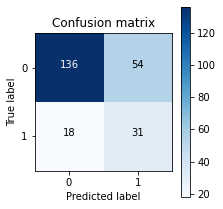

-----------------------------
Model number: 41
Best F1: 0.460431654676259
Best threshold: 0.1950000000000001
MCC: 0.28979281596435225
Acc: 0.6861924686192469


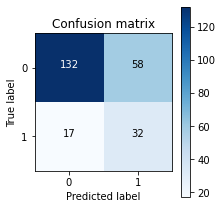

-----------------------------
Model number: 42
Best F1: 0.49350649350649345
Best threshold: 0.16500000000000006
MCC: 0.3439881846156861
Acc: 0.6736401673640168


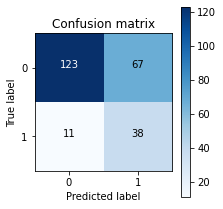

-----------------------------
Model number: 49
Best F1: 0.48366013071895425
Best threshold: 0.18500000000000008
MCC: 0.32773686771604843
Acc: 0.6694560669456067


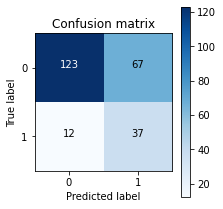

-----------------------------
Model number: 51
Best F1: 0.4661654135338346
Best threshold: 0.41000000000000025
MCC: 0.2990965462242345
Acc: 0.702928870292887


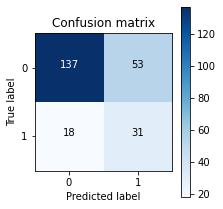

-----------------------------
Model number: 57
Best F1: 0.4705882352941177
Best threshold: 0.49500000000000033
MCC: 0.3050720442721852
Acc: 0.698744769874477


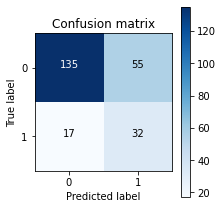

-----------------------------
Model number: 58
Best F1: 0.5039370078740157
Best threshold: 0.5050000000000003
MCC: 0.3538424112330904
Acc: 0.7364016736401674


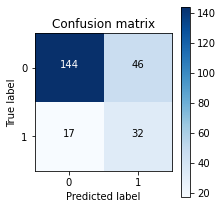

-----------------------------
Model number: 61
Best F1: 0.4861111111111111
Best threshold: 0.3500000000000002
MCC: 0.32874262634111423
Acc: 0.6903765690376569


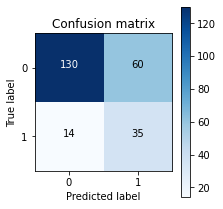

-----------------------------
Model number: 62
Best F1: 0.46601941747572817
Best threshold: 0.5200000000000004
MCC: 0.32040618785615893
Acc: 0.7698744769874477


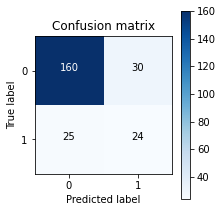

-----------------------------
Model number: 67
Best F1: 0.48979591836734687
Best threshold: 0.39500000000000024
MCC: 0.33520823387436965
Acc: 0.6861924686192469


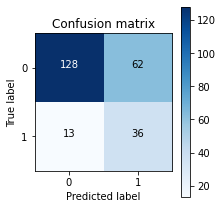

-----------------------------


In [34]:
# Use only models that were trained successfully
mod_nums = [40, 41, 42, 49, 51, 57, 58, 61, 62, 67]
thresholds = {}
for i in mod_nums:
    model = keras.models.load_model(path.join(DATA_DIR, f"models/LSTM5_{i}"))
    y_pred = model.predict(X_test)
    best_f1 = 0
    best_t = 0
    for t in np.arange(0.1, 0.7, 0.005):
        bin_pred = binarize(y_pred, t)
        f1 = metrics.f1_score(y_test, bin_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
    thresholds[i] = best_t        
    
    print(f"Model number: {i}")
    print(f"Best F1: {best_f1}")
    print(f"Best threshold: {best_t}")
    bin_pred = binarize(y_pred, best_t)
    print(f"MCC: {metrics.matthews_corrcoef(y_test, bin_pred)}")
    print(f"Acc: {metrics.accuracy_score(y_test, bin_pred)}")
    plot_confusion_matrix(metrics.confusion_matrix(y_test, bin_pred), [0,1])
    print("-----------------------------")

Best models: 42, 58, 67  

# Check threshold / score relation

Model number 42:


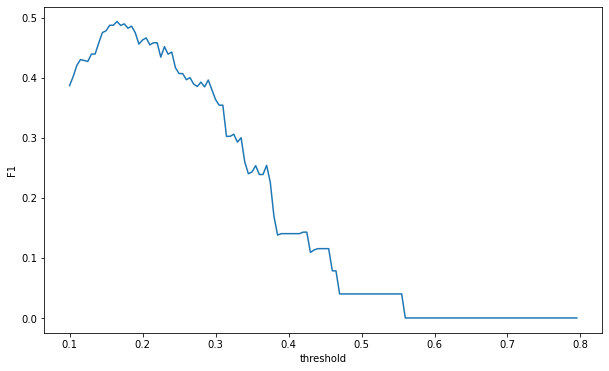

Model number 58:


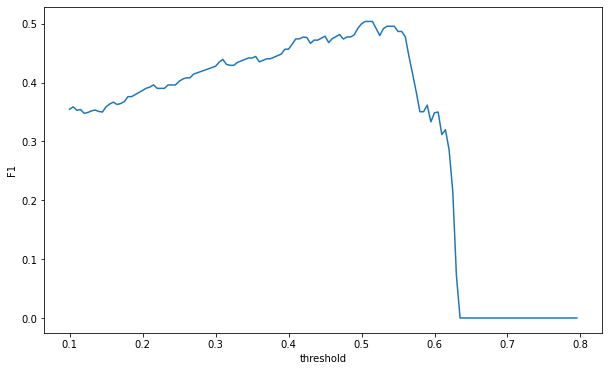

Model number 67:


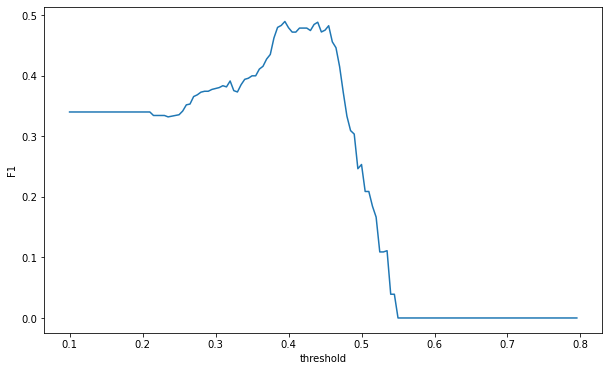

In [18]:
for i in [42, 58, 67]:
    model = keras.models.load_model(path.join(DATA_DIR, f"models/LSTM5_{i}"))
    y_pred = model.predict(X_test)

    scores = []
    thresholds = []
    for t in np.arange(0.1, 0.8, 0.005):
        bin_pred = binarize(y_pred, t)
        f1 = metrics.f1_score(y_test, bin_pred)
        scores.append(f1)
        thresholds.append(t)
    
    print(f"Model number {i}:")
    plt.figure(figsize=(10,6))
    plt.ylabel("F1")
    plt.xlabel("threshold")
    plt.plot(thresholds, scores)
    plt.savefig(path.join(DATA_DIR, f'images/model_{i}_threshold_dependence.png'))
    plt.show()

# Test on TAP

In [19]:
tap_data = pd.read_csv(path.join(DATA_DIR, "tap/TAP_data.csv"), index_col=0)
tap = pd.read_csv(path.join(DATA_DIR, "tap/integer_encoding/tap_integer_encoded_separate_short.csv"))

In [20]:
X_tap = tap.to_numpy()
y_tap = tap_data["Y"].to_numpy()

In [25]:
for i in [42, 58, 67]:
    model = keras.models.load_model(path.join(DATA_DIR, f"models/LSTM5_{i}"))
    y_pred = model.predict(X_test)
    bin_pred = binarize(y_pred, thresholds[i])
    print(f"Model number: {i}")
    print(f"MCC: {metrics.matthews_corrcoef(y_test, bin_pred)}")
    print(f"Acc: {metrics.accuracy_score(y_test, bin_pred)}")
    print("-----------------------------")
    print("\n")

Model number: 42
MCC: 0.3439881846156861
Acc: 0.6736401673640168
-----------------------------


Model number: 58
MCC: 0.3538424112330904
Acc: 0.7364016736401674
-----------------------------


Model number: 67
MCC: 0.33520823387436965
Acc: 0.6861924686192469
-----------------------------


